In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217898569-12_55.txt')

df2 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217899985-1_02.txt')

df3 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217903881-1_06.txt')

df4 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217906095-1_09.txt')

df5 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217913809-1_24.txt')


# dataframes for pothole annotated files

pdf1 = pd.read_csv('./potholes/sensorData_23-03-2018_15217898607-12_55.txt')
pdf2 = pd.read_csv('./potholes/sensorData_23-03-2018_15217899997-1_02.txt')
pdf3 = pd.read_csv('./potholes/sensorData_23-03-2018_15217903905-1_06.txt')
pdf4 = pd.read_csv('./potholes/sensorData_23-03-2018_15217906130-1_09.txt')
pdf5 = pd.read_csv('./potholes/sensorData_23-03-2018_15217914003-1_24.txt')

pdf5.shape

(37, 4)

In [4]:
df1.head()
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
df2.head()

print(pdf1.shape)
print(pdf2.shape)
print(pdf3.shape)
print(pdf4.shape)
print(pdf5.shape)


(419, 10)
(1565, 10)
(847, 10)
(660, 10)
(1328, 10)
(6, 4)
(33, 4)
(16, 4)
(16, 4)
(37, 4)


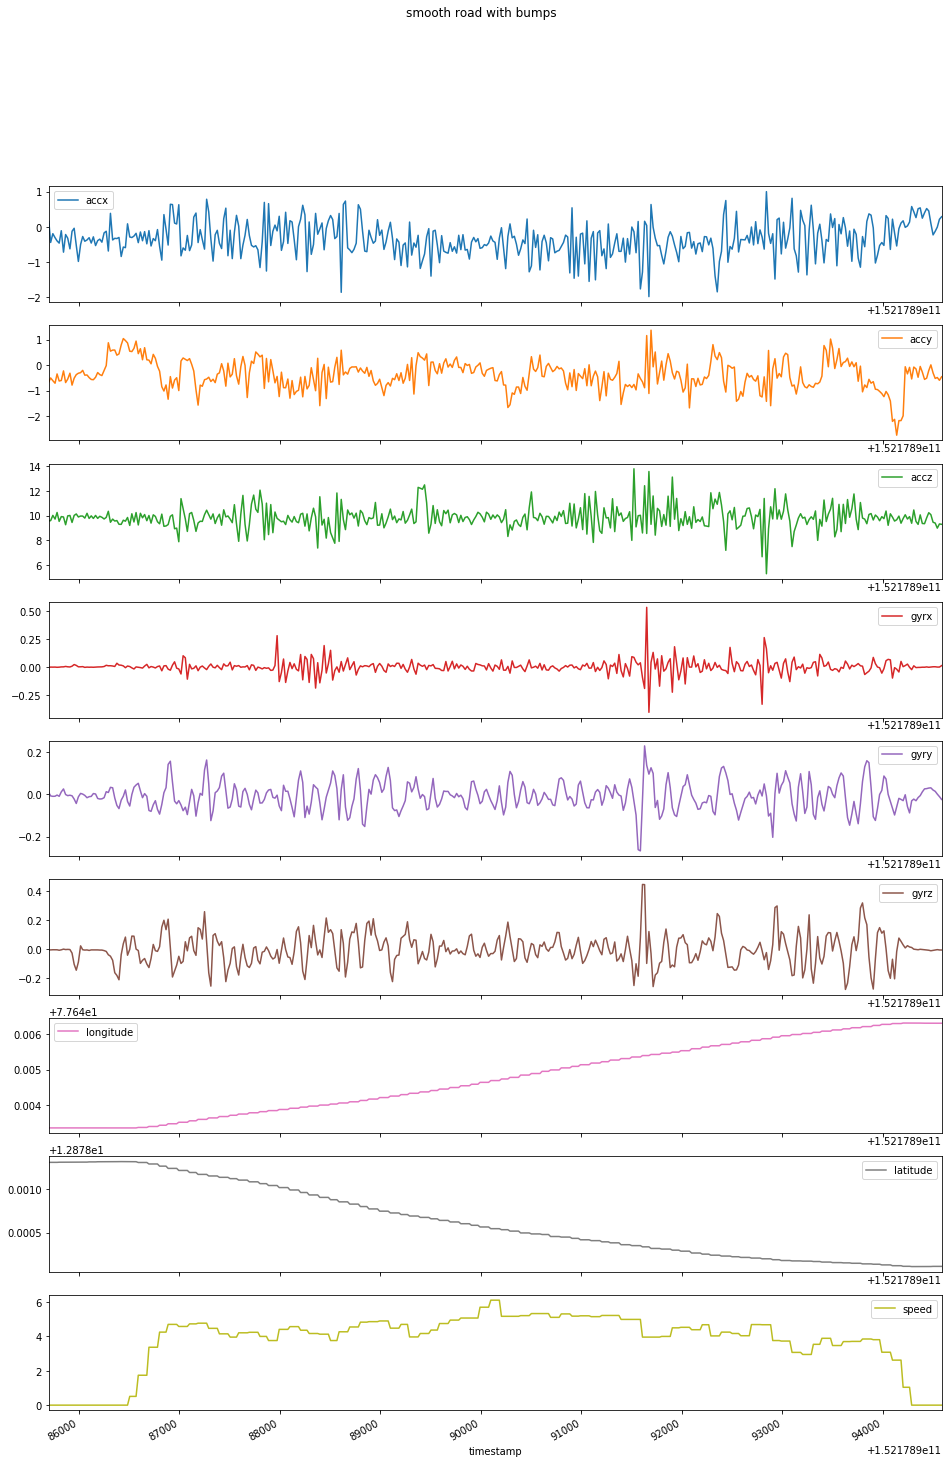

In [5]:
df1.plot(x = 'timestamp', subplots= True, figsize= (16,25), title='smooth road with bumps')
plt.show()

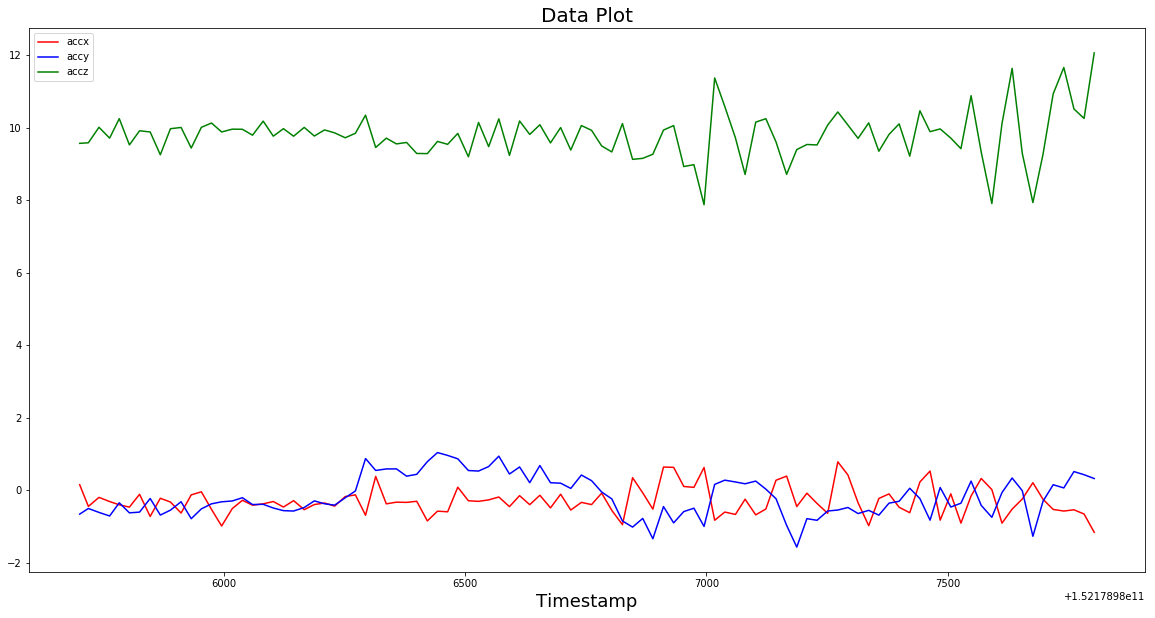

In [6]:
df_testing = df1.head(100)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df_testing.timestamp,df_testing.accx,'r')
plt.plot(df_testing.timestamp,df_testing.accy,'b')
plt.plot(df_testing.timestamp,df_testing.accz,'g')
plt.title('Data Plot', fontsize=20)
plt.xlabel('Timestamp',fontsize=18)
plt.legend()
plt.show()

In [7]:
len(df1)

419

In [8]:
df1.head()

,timestamp,accx,accy,accz,gyrx,gyry,gyrz,longitude,latitude,speed
0,152178985702,0.152901,-0.657606,9.569601,-0.002742,0.008070,-0.005377,77.643354,12.87931,0.0
1,152178985720,-0.444470,-0.501953,9.585513,0.000966,-0.007851,-0.005371,77.643354,12.87931,0.0
2,152178985742,-0.195615,-0.610109,10.012871,0.000354,-0.009804,-0.004395,77.643354,12.87931,0.0
3,152178985764,-0.310112,-0.708696,9.713529,0.000969,-0.009312,-0.004761,77.643354,12.87931,0.0
4,152178985784,-0.400679,-0.345822,10.250119,-0.000861,-0.003700,-0.004639,77.643354,12.87931,0.0


In [9]:
df1.shape

(419, 10)

In [28]:
arrx = df1.as_matrix(columns=df1.columns[1:2])   # converting to numpy array
arrx

# applying fast fourier transform
np.fft.rfft(arrx,n=10).real

array([[ 0.1529007 ,  0.1529007 ,  0.1529007 ,  0.1529007 ,  0.1529007 ,
         0.1529007 ],
       [-0.44447023, -0.44447023, -0.44447023, -0.44447023, -0.44447023,
        -0.44447023],
       [-0.19561462, -0.19561462, -0.19561462, -0.19561462, -0.19561462,
        -0.19561462],
       ...,
       [-0.00754089, -0.00754089, -0.00754089, -0.00754089, -0.00754089,
        -0.00754089],
       [ 0.21284027,  0.21284027,  0.21284027,  0.21284027,  0.21284027,
         0.21284027],
       [ 0.28726044,  0.28726044,  0.28726044,  0.28726044,  0.28726044,
         0.28726044]])

In [354]:
df_main = pd.read_csv('./features.txt')
df_main

,ts_start,ts_end,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,...,min_gx,min_gy,min_gz,max_ax,max_ay,max_az,max_gx,max_gy,max_gz,label


In [355]:
# merging all 5 identical dataframes

df_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
print("total approx no of rows" ,df_merged.shape)

# this won't work because : may be two df get merged in aggregating task

df1.shape

for i in range(0,20,5):
    print(i)

total approx no of rows (4819, 10)
0
5
10
15


In [356]:
# this is to calcualte features by aggregating 10 data pts
df_index =0

for j in range(0,5):
    
    if(df_index == 0):
        df = df1
        pdf = pdf1
    elif(df_index == 1):
        df = df2
        pdf = pdf2
    elif(df_index == 2):
        df = df3
        pdf = pdf3
    elif(df_index == 3):
        df = df4
        pdf = pdf4
    else:
        df = df5
        pdf = pdf5
    
    df_index += 1
    count = 0
    k = 0
    
    for i in range(1,len(df),10):    # step size is 10 means aggregrating 10 data pts means 1 second data
        if(i+9 >= len(df)):
            break
        #print(i)
        dt = df[i-1:i+10]      # chunking the given dataframe into smaller dataframe containing 10 pts
        start = dt.timestamp[i-1]
        end = dt.timestamp[i+9]
        a = dt.mean()      # will give an array of mean of columns of dt
        mean_ax = a[1]
        mean_ay = a[2]
        mean_az = a[3]
        mean_gx = a[4]
        mean_gy = a[5]
        mean_gz = a[6]
        a = dt.min()
        min_ax = a[1]
        min_ay = a[2]
        min_az = a[3]
        min_gx = a[4]
        min_gy = a[5]
        min_gz = a[6]
        a = dt.max()
        max_ax = a[1]
        max_ay = a[2]
        max_az = a[3]
        max_gx = a[4]
        max_gy = a[5]
        max_gz = a[6]
        a = dt.std()
        sd_ax = a[1]
        sd_ay = a[2]
        sd_az = a[3]
        sd_gx = a[4]
        sd_gy = a[5]
        sd_gz = a[6]
        
        # adding label
        if(k >= len(pdf)):
            break        
        
        if(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end ):
            label = 1
            k = k + 1
            #print("haha")
            
            if(k >= len(pdf)):
                break
            while(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end):
                k = k + 1
                if(k >= len(pdf)):
                        break
        else:
            label = 0
        
        df_temp = pd.DataFrame([[start, end, mean_ax, mean_ay, mean_az, mean_gx,mean_gy, mean_gz, 
                               sd_ax, sd_ay, sd_az, sd_gx, sd_gy, sd_gz,min_ax, min_ay,
                               min_az, min_gx, min_gy, min_gz, max_ax, max_ay, max_az, max_gx, max_gy, max_gz , label]], 

                              columns = ('ts_start','ts_end','mean_ax','mean_ay','mean_az','mean_gx','mean_gy',
                                         'mean_gz','sd_ax','sd_ay','sd_az','sd_gx','sd_gy','sd_gz','min_ax','min_ay',
                                         'min_az','min_gx','min_gy','min_gz','max_ax','max_ay','max_az','max_gx',
                                         'max_gy','max_gz', 'label'))
        
        df_main = df_main.append(df_temp)
        #count = count + 1
        #i = i+20

In [357]:
df_main.shape

(438, 27)

In [358]:
df_main.head()

,ts_start,ts_end,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,...,min_gx,min_gy,min_gz,max_ax,max_ay,max_az,max_gx,max_gy,max_gz,label
0,152178985702,152178985912,-0.333256,-0.529265,9.790426,0.001520,-0.000742,-0.004106,0.242658,0.162682,...,-0.002742,-0.009804,-0.007817,0.152901,-0.226779,10.250119,0.006834,0.025240,0.000006,0
0,152178985912,152178986124,-0.422345,-0.421185,9.919289,0.005632,-0.011685,-0.034437,0.254251,0.158947,...,-0.001598,-0.043526,-0.145503,-0.041873,-0.205003,10.182401,0.023814,0.003989,0.022479,0
0,152178986124,152178986337,-0.312917,-0.081383,9.855358,0.006088,-0.000170,-0.020531,0.279257,0.514140,...,-0.000620,-0.022508,-0.077083,0.383211,0.875952,10.347148,0.016971,0.032701,-0.005371,0
0,152178986337,152178986549,-0.374978,0.672824,9.570090,0.008233,-0.016506,-0.037798,0.235341,0.213451,...,-0.016133,-0.067838,-0.211595,0.085185,1.039981,10.145551,0.035298,0.033188,0.089906,0
0,152178986549,152178986762,-0.313581,0.429496,9.818923,0.000324,-0.010486,-0.039492,0.153429,0.272872,...,-0.016133,-0.080904,-0.127295,-0.108875,0.941278,10.244975,0.025278,0.051878,0.089172,0


In [359]:
# we have ts start and end , and we have 26 features regarding sensor data 

# next step is : to take pothole data file and aggregating sensor data and pothole data using timestamp

# lets look if pothole falls in one of the timestamp

In [360]:
df_main['label'].value_counts()

0    340
1     98
Name: label, dtype: int64

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [369]:
data = np.array(df_main)

x = data[:,2:-1]
y = data[:,-1:]
y = y.astype(int)

In [370]:
y_train

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [371]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy_score(y_pred,y_test)

/home/tolani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8181818181818182

In [372]:
from sklearn.svm import SVC

In [382]:
model = SVC(kernel='rbf', gamma = 1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy_score(y_pred,y_test)

/home/tolani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7840909090909091

In [390]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [396]:
pca = PCA(0.99)

In [397]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [398]:
x_trans_train = pca.transform(x_train)
x_trans_test = pca.transform(x_test)

In [399]:
x_trans_train.shape

(350, 11)

In [400]:
model = LogisticRegression()
model.fit(x_trans_train,y_train)
y_pred = model.predict(x_trans_test)

accuracy_score(y_pred,y_test)

/home/tolani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8295454545454546

In [403]:
scaler = StandardScaler()
scaler.fit(x_train)

/home/tolani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [404]:
x2_train = scaler.transform(x_train)
x2_test = scaler.transform(x_test)

/home/tolani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [407]:
model = SVC()
model.fit(x2_train,y_train)
y_pred = model.predict(x2_test)

accuracy_score(y_pred,y_test)

/home/tolani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7954545454545454

In [408]:
import keras

/home/tolani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [409]:
from keras.models import Sequential
from keras.layers import Dense

In [410]:
x_train.shape

(350, 24)

In [448]:
model = Sequential()
model.add(Dense(units=20,activation="relu",input_dim =11))
model.add(Dense(units=10,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
#model.add(Dense(units=10,activation="softmax"))

In [449]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [450]:
model.fit(x_trans_train,y_train, batch_size= 10, epochs= 100)

Epoch 1/100
350/350 [==============================] - 0s 694us/step - loss: 0.6528 - acc: 0.7743
Epoch 2/100
350/350 [==============================] - 0s 163us/step - loss: 0.5545 - acc: 0.7800
Epoch 3/100
350/350 [==============================] - 0s 146us/step - loss: 0.4799 - acc: 0.7800
Epoch 4/100
350/350 [==============================] - 0s 164us/step - loss: 0.4336 - acc: 0.7914
Epoch 5/100
350/350 [==============================] - 0s 170us/step - loss: 0.4060 - acc: 0.8257
Epoch 6/100
350/350 [==============================] - 0s 189us/step - loss: 0.3883 - acc: 0.8457
Epoch 7/100
350/350 [==============================] - 0s 195us/step - loss: 0.3781 - acc: 0.8457
Epoch 8/100
350/350 [==============================] - 0s 189us/step - loss: 0.3682 - acc: 0.8600
Epoch 9/100
350/350 [==============================] - 0s 173us/step - loss: 0.3601 - acc: 0.8600
Epoch 10/100
350/350 [==============================] - 0s 176us/step - loss: 0.3543 - acc: 0.8657 0s - loss: 0.3554 -

In [451]:
y_pred = model.predict_classes(x_trans_test)
accuracy_score(y_test, y_pred)

0.8181818181818182